Import Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from google.colab import files
uploaded = files.upload()

Saving healthcare_dataset.csv to healthcare_dataset (2).csv


# Load and read data

In [24]:
df = pd.read_csv('healthcare_dataset.csv')

In [25]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [28]:
df.describe(include='all')

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
count,10000,10000.000000,10000,10000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000,10000,10000
unique,9378,NaN,2,8,6,1815,9416,8639,5,NaN,NaN,3,1834,5,3
top,Michael Johnson,NaN,Female,AB-,Asthma,2022-04-27,Michael Johnson,Smith PLC,Cigna,NaN,NaN,Urgent,2021-11-28,Penicillin,Abnormal
freq,7,NaN,5075,1275,1708,15,7,19,2040,NaN,NaN,3391,14,2079,3456
mean,NaN,51.452200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25516.806778,300.082000,NaN,NaN,NaN,NaN
std,NaN,19.588974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14067.292709,115.806027,NaN,NaN,NaN,NaN
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.180837,101.000000,NaN,NaN,NaN,NaN
25%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13506.523967,199.000000,NaN,NaN,NaN,NaN
50%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25258.112566,299.000000,NaN,NaN,NaN,NaN
75%,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37733.913727,400.000000,NaN,NaN,NaN,NaN


In [29]:
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])


Number of Rows: 10000
Number of Columns: 15


# (EDA) Exploratory Data Analysis

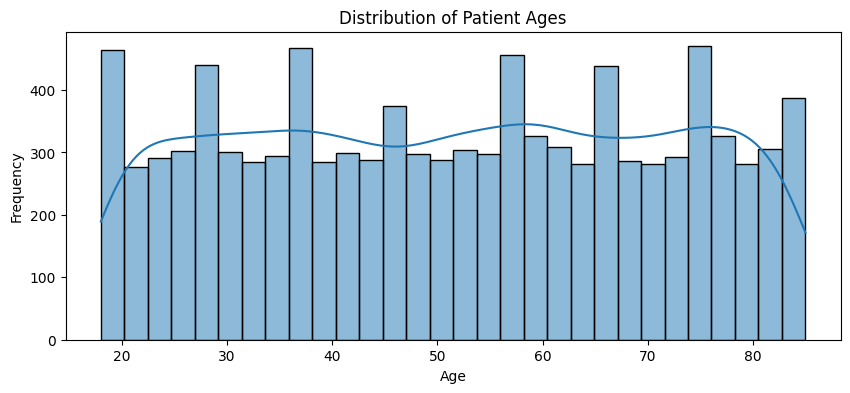

In [30]:
plt.figure(figsize=(10, 4))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Distribution of Patient Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


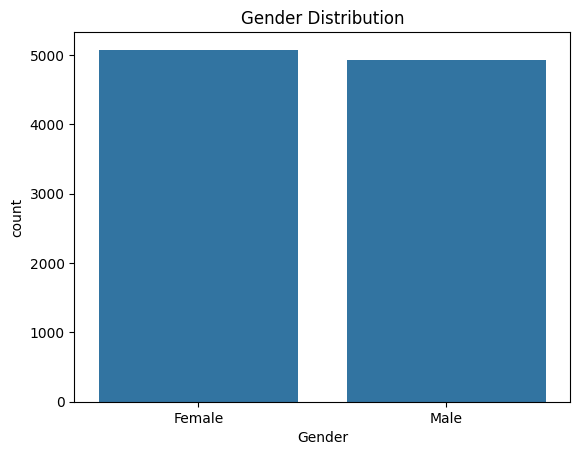

In [31]:
sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")
plt.show()


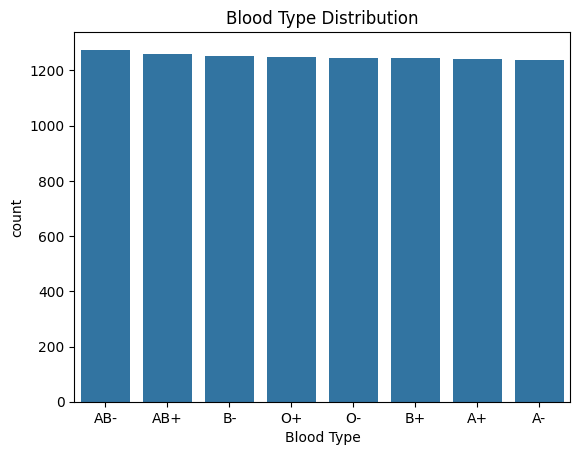

In [32]:
sns.countplot(data=df, x='Blood Type', order=df['Blood Type'].value_counts().index)
plt.title("Blood Type Distribution")
plt.show()


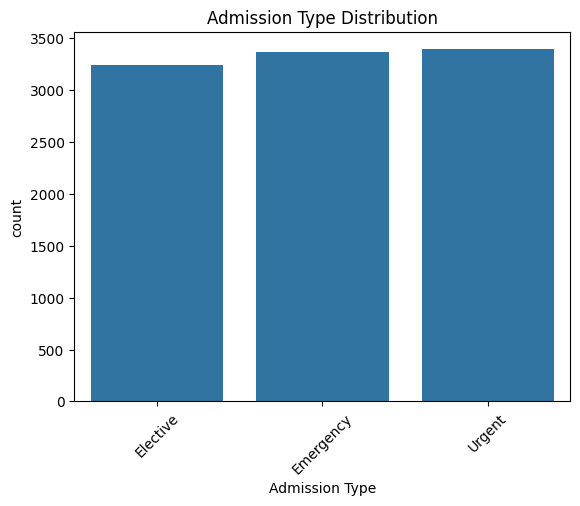

In [33]:
sns.countplot(data=df, x='Admission Type')
plt.title("Admission Type Distribution")
plt.xticks(rotation=45)
plt.show()


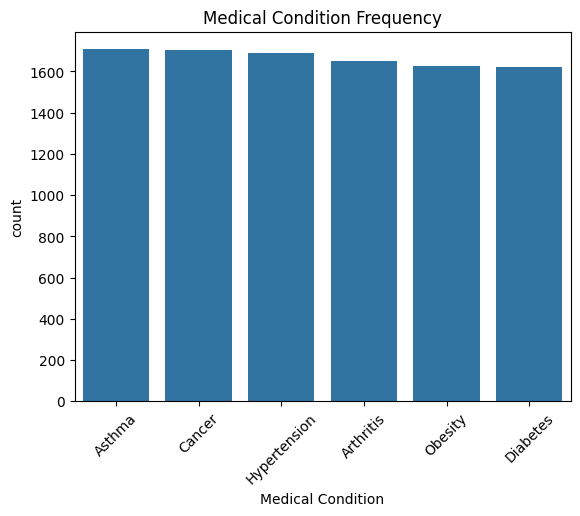

In [34]:
sns.countplot(data=df, x='Medical Condition', order=df['Medical Condition'].value_counts().index)
plt.title("Medical Condition Frequency")
plt.xticks(rotation=45)
plt.show()



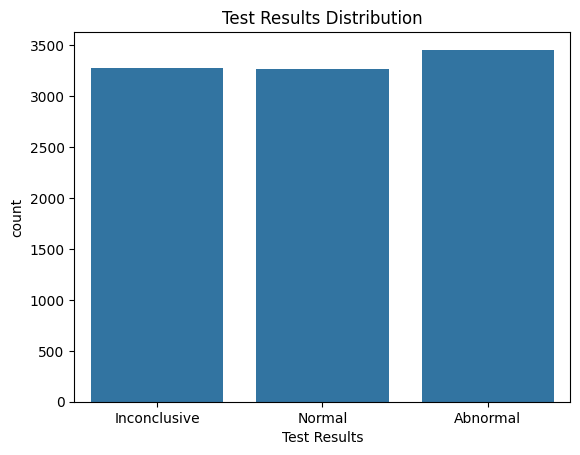

In [35]:
sns.countplot(data=df, x='Test Results')
plt.title("Test Results Distribution")
plt.show()


In [36]:
df.describe(include='all')


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
count,10000,10000.000000,10000,10000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000,10000,10000
unique,9378,NaN,2,8,6,1815,9416,8639,5,NaN,NaN,3,1834,5,3
top,Michael Johnson,NaN,Female,AB-,Asthma,2022-04-27,Michael Johnson,Smith PLC,Cigna,NaN,NaN,Urgent,2021-11-28,Penicillin,Abnormal
freq,7,NaN,5075,1275,1708,15,7,19,2040,NaN,NaN,3391,14,2079,3456
mean,NaN,51.452200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25516.806778,300.082000,NaN,NaN,NaN,NaN
std,NaN,19.588974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14067.292709,115.806027,NaN,NaN,NaN,NaN
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.180837,101.000000,NaN,NaN,NaN,NaN
25%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13506.523967,199.000000,NaN,NaN,NaN,NaN
50%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25258.112566,299.000000,NaN,NaN,NaN,NaN
75%,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37733.913727,400.000000,NaN,NaN,NaN,NaN


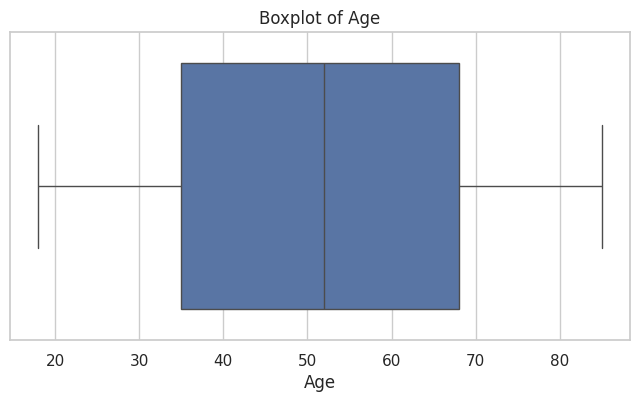

In [40]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")
plt.show()


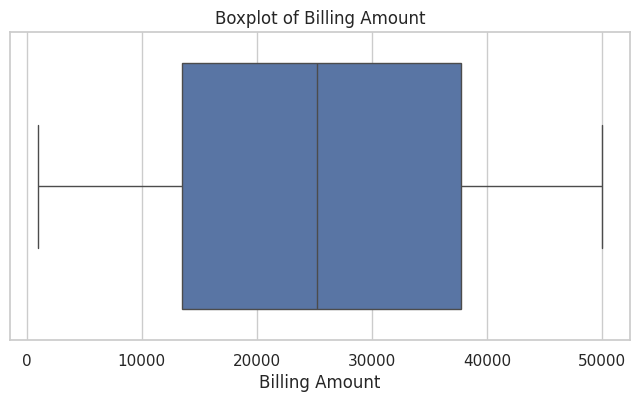

In [41]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Billing Amount'])
plt.title("Boxplot of Billing Amount")
plt.show()

In [42]:
def print_outlier_info(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    total = df.shape[0]
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    num_outliers = outliers.shape[0]
    percentage = (num_outliers / total) * 100

    print(f"--- {column} ---")
    print(f"Q1 (25%): {Q1}")
    print(f"Q3 (75%): {Q3}")
    print(f"IQR: {IQR}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Number of Outliers: {num_outliers} out of {total} rows")
    print(f"Percentage of Outliers: {percentage:.2f}%")
    print()

print_outlier_info(df, 'Age')
print_outlier_info(df, 'Billing Amount')


--- Age ---
Q1 (25%): 35.0
Q3 (75%): 68.0
IQR: 33.0
Lower Bound: -14.5
Upper Bound: 117.5
Number of Outliers: 0 out of 10000 rows
Percentage of Outliers: 0.00%

--- Billing Amount ---
Q1 (25%): 13506.523967408722
Q3 (75%): 37733.91372727789
IQR: 24227.38975986917
Lower Bound: -22834.560672395033
Upper Bound: 74074.99836708164
Number of Outliers: 0 out of 10000 rows
Percentage of Outliers: 0.00%



In [44]:
col = 'Age'

print(f"--- Statistics for '{col}' ---")
print(f"Mean   : {df[col].mean()}")
print(f"Median : {df[col].median()}")
print(f"Mode   : {df[col].mode()[0]}")
print(f"Min    : {df[col].min()}")
print(f"Max    : {df[col].max()}")
print(f"Std    : {df[col].std()}")


--- Statistics for 'Age' ---
Mean   : 51.4522
Median : 52.0
Mode   : 59
Min    : 18
Max    : 85
Std    : 19.588973631836524


In [43]:
col = 'Billing Amount'

print(f"--- Statistics for '{col}' ---")
print(f"Mean   : {df[col].mean()}")
print(f"Median : {df[col].median()}")
print(f"Mode   : {df[col].mode()[0]}")
print(f"Min    : {df[col].min()}")
print(f"Max    : {df[col].max()}")
print(f"Std    : {df[col].std()}")


--- Statistics for 'Billing Amount' ---
Mean   : 25516.8067777384
Median : 25258.112566373504
Mode   : 1000.1808370217516
Min    : 1000.1808370217516
Max    : 49995.90228322116
Std    : 14067.292709226198


In [45]:
col = 'Room Number'

print(f"--- Statistics for '{col}' ---")
print(f"Mean   : {df[col].mean()}")
print(f"Median : {df[col].median()}")
print(f"Mode   : {df[col].mode()[0]}")
print(f"Min    : {df[col].min()}")
print(f"Max    : {df[col].max()}")
print(f"Std    : {df[col].std()}")


--- Statistics for 'Room Number' ---
Mean   : 300.082
Median : 299.0
Mode   : 358
Min    : 101
Max    : 500
Std    : 115.8060265252975


In [46]:
df = df.drop(columns=[
    "Name",
    "Doctor",
    "Room Number",
    "Date of Admission",
    "Discharge Date"
])


In [47]:
print(df.isnull().sum())


Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Hospital              0
Insurance Provider    0
Billing Amount        0
Admission Type        0
Medication            0
Test Results          0
dtype: int64


# Data Preprocessing

Label Encoder

In [48]:
label_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Hospital',
              'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']

le_dict = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le


Train Test

In [49]:
X = df.drop(columns=['Test Results'])  # features
y = df['Test Results']                 # target


In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


 Standard Scaler

In [53]:
scaler = StandardScaler()

# Fit only on training data, transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


One_Hot Encoding

In [55]:
df = pd.get_dummies(df, columns=["Gender", "Blood Type", "Admission Type", "Medication", "Insurance Provider"], drop_first=True)


In [57]:
print(df["Test Results"].unique())
print(df["Test Results"].dtype)


[1 2 0]
int64


Feature Importance

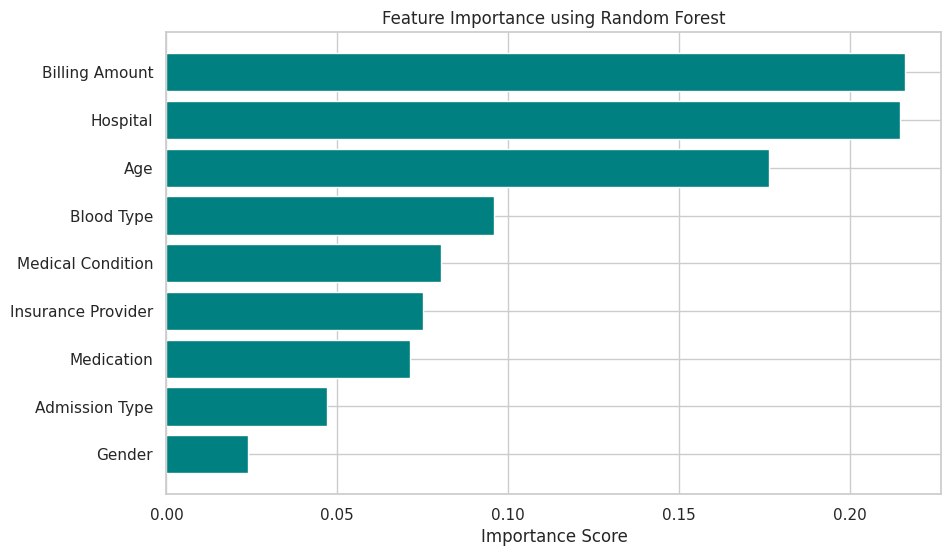

In [58]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort and plot
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
plt.xlabel('Importance Score')
plt.title('Feature Importance using Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [59]:
print(importance_df)


              Feature  Importance
6      Billing Amount    0.215975
4            Hospital    0.214645
0                 Age    0.176196
2          Blood Type    0.095835
3   Medical Condition    0.080354
5  Insurance Provider    0.075111
8          Medication    0.071140
7      Admission Type    0.046925
1              Gender    0.023820


# Model Training and Evaluation

Logistic regression

In [60]:
lr_model.fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.348
Precision: 0.34940847116079937
Recall: 0.348
F1 Score: 0.3175740772680234

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.61      0.45       706
           1       0.32      0.28      0.30       636
           2       0.37      0.13      0.19       658

    accuracy                           0.35      2000
   macro avg       0.35      0.34      0.31      2000
weighted avg       0.35      0.35      0.32      2000


Confusion Matrix:
 [[432 192  82]
 [392 178  66]
 [394 178  86]]


Random Forest

In [61]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.336
Precision: 0.33464718845758074
Recall: 0.336
F1 Score: 0.33463910501624516

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.40      0.38       706
           1       0.32      0.32      0.32       636
           2       0.32      0.29      0.30       658

    accuracy                           0.34      2000
   macro avg       0.33      0.33      0.33      2000
weighted avg       0.33      0.34      0.33      2000

Confusion Matrix:
 [[280 220 206]
 [242 203 191]
 [260 209 189]]


XGBoost

In [62]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)

print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:54:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results:
Accuracy: 0.344
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.38      0.37       706
           1       0.32      0.32      0.32       636
           2       0.35      0.33      0.34       658

    accuracy                           0.34      2000
   macro avg       0.34      0.34      0.34      2000
weighted avg       0.34      0.34      0.34      2000

Confusion Matrix:
 [[265 231 210]
 [235 205 196]
 [229 211 218]]


CatBoost

In [65]:
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train_scaled, y_train)

y_pred_cat = cat_model.predict(X_test_scaled)

print("CatBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_cat))
print("Classification Report:\n", classification_report(y_test, y_pred_cat))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cat))


CatBoost Results:
Accuracy: 0.3305
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.36      0.35       706
           1       0.30      0.30      0.30       636
           2       0.35      0.33      0.34       658

    accuracy                           0.33      2000
   macro avg       0.33      0.33      0.33      2000
weighted avg       0.33      0.33      0.33      2000

Confusion Matrix:
 [[254 242 210]
 [245 190 201]
 [244 197 217]]


Gradient Boosting Classifier

In [66]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

y_pred_gb = gb_model.predict(X_test_scaled)

print("Gradient Boosting Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Results:
Accuracy: 0.333
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.45      0.39       706
           1       0.30      0.29      0.30       636
           2       0.36      0.25      0.29       658

    accuracy                           0.33      2000
   macro avg       0.33      0.33      0.33      2000
weighted avg       0.33      0.33      0.33      2000

Confusion Matrix:
 [[317 243 146]
 [307 187 142]
 [295 201 162]]


PCA

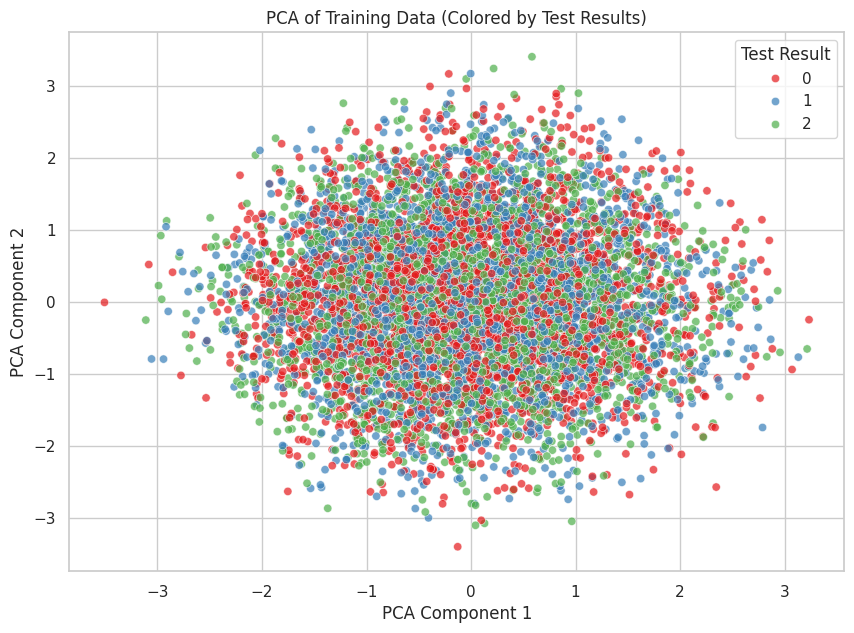

In [68]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette='Set1', alpha=0.7)
plt.title('PCA of Training Data (Colored by Test Results)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Test Result')
plt.grid(True)
plt.show()


In [70]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)


pca_df = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
pca_df["Target"] = y_train.reset_index(drop=True)

print(pca_df.head(10))


       PCA1      PCA2  Target
0 -0.420710  0.463472       0
1 -2.099073 -0.129940       1
2  1.863171  1.063971       2
3 -1.377267  1.396586       0
4  1.774898  1.465459       2
5  1.437116  0.311306       1
6  1.065048 -0.686271       1
7 -0.303568 -0.640517       2
8  1.230285  1.107878       0
9  0.788592  2.090641       2


Support Vector Machine

In [75]:
model = SVC()


params = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}

grid = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

Decision Tree

In [76]:
model = DecisionTreeClassifier()
params = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}


XGBoost

In [77]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}


GridSearchCV

In [78]:
grid = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)



y_pred = grid.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:37:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 100}
Best Score: 0.33774999999999994
Accuracy: 0.341
Report:
               precision    recall  f1-score   support

           0       0.37      0.36      0.36       706
           1       0.32      0.34      0.33       636
           2       0.34      0.32      0.33       658

    accuracy                           0.34      2000
   macro avg       0.34      0.34      0.34      2000
weighted avg       0.34      0.34      0.34      2000

Confusion Matrix:
 [[255 242 209]
 [221 217 198]
 [222 226 210]]


## Model Saving

In [84]:
import joblib

joblib.dump(grid.best_estimator_, 'healthcare_model.pkl')
joblib.dump(xgb_model, 'healthcare_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']